In [23]:
import pvdeg
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
front_range_map = pvdeg.scenario.GeospatialScenario(
    name='front_range_map',
)

front_range_map.addLocation(
    state='Colorado',
)   

/home/tford/.conda-envs/pvdeg_env/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "phony_dim_1" starting at index 500. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


In [3]:
# fix 2d array
front_range_map.location_bounding_box(
    coord_1=[39.419, -106.08],
    coord_2=[39.3257, -104.3115]
)

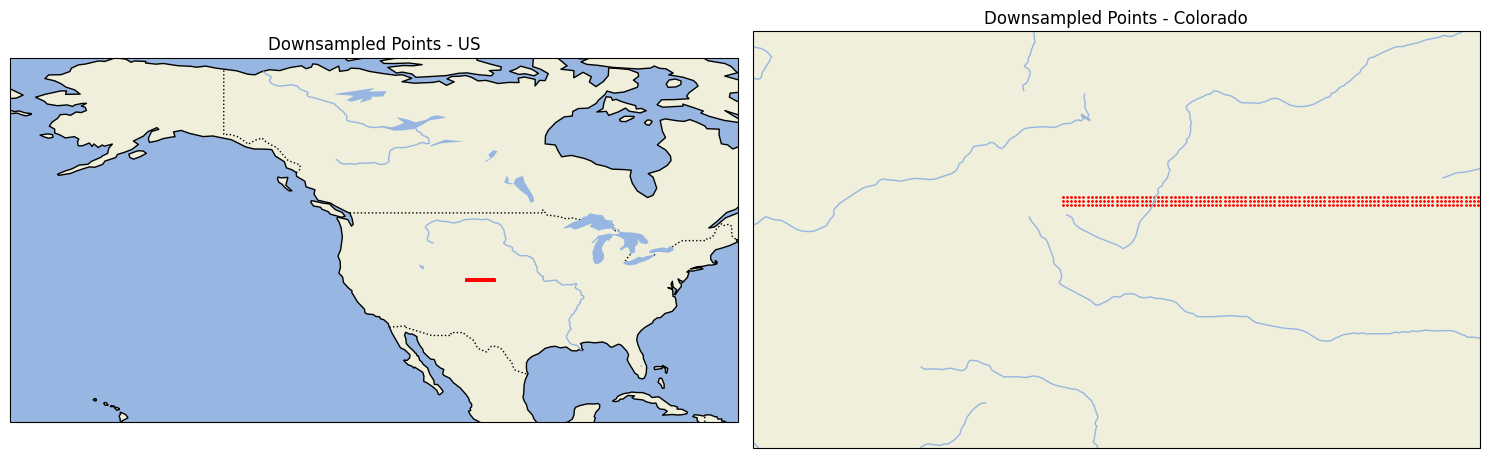

In [4]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot for the US
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.LAKES)
ax1.add_feature(cfeature.RIVERS)

US_bbox = (-171.791110603, 18.91619, -66.96466, 71.3577635769)
ax1.set_xlim(US_bbox[0], US_bbox[2])  # Set longitude limits
ax1.set_ylim(US_bbox[1], US_bbox[3])  # Set latitude limits

meta = front_range_map.meta_data
ax1.scatter(meta['longitude'], meta['latitude'], s=1, color='red', transform=ccrs.PlateCarree())
ax1.set_title('Downsampled Points - US')

# Plot for Colorado
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.LAKES)
ax2.add_feature(cfeature.RIVERS)

# Set to show all of Colorado using coordinates
min_long, max_long = -109.0452, -102.0416
min_lat, max_lat = 36.9931, 41.0034
ax2.set_extent([min_long, max_long, min_lat, max_lat], crs=ccrs.PlateCarree())

ax2.scatter(meta['longitude'], meta['latitude'], s=1, color='red', transform=ccrs.PlateCarree())
ax2.set_title('Downsampled Points - Colorado')

# Show the plots
plt.tight_layout()
plt.show()

In [5]:
front_range_map.addJob(
    pvdeg.standards.standoff,
    see_added=True
)

/home/tford/dev/PVDegradationTools/pvdeg/scenario.py:1099: UserWarning: standoff added to pipeline as 
 {'geospatial_job': {'job': <function standoff at 0x7fd08cf91c60>, 'params': {}}}
  warnings.warn(message, UserWarning)


In [6]:
front_range_map.run()

Dashboard: http://127.0.0.1:8787/status
The array tilt angle was not provided, therefore the latitude tilt of 39.4 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 39.4 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 39.3 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 39.4 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 39.4 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was used.
The array tilt angle was not provided, therefore the latitude tilt of 39.3 was used.
The array azimuth was not provided, therefore an azimuth of 180.0 was 

In [18]:
front_range_map.results

<xarray.Dataset> Size: 8kB
Dimensions:    (latitude: 3, longitude: 101)
Coordinates:
  * latitude   (latitude) float32 12B 39.33 39.37 39.41
  * longitude  (longitude) float32 404B -106.1 -106.0 -106.0 ... -102.1 -102.1
Data variables:
    x          (latitude, longitude) float64 2kB 0.1565 0.0 0.0 ... 2.861 2.845
    T98_0      (latitude, longitude) float64 2kB 70.61 68.96 ... 78.55 78.52
    T98_inf    (latitude, longitude) float64 2kB 44.89 42.75 ... 54.54 54.49
Attributes:
    long_name:  Standoff dataset

In [11]:
front_range_map

In [16]:
standoff_results = xr.open_dataset("front-range-standoff.nc").load() # want to load into memory rather than lazy using load()

In [17]:
standoff_results

<xarray.Dataset> Size: 8kB
Dimensions:    (latitude: 3, longitude: 101)
Coordinates:
  * latitude   (latitude) float32 12B 39.33 39.37 39.41
  * longitude  (longitude) float32 404B -106.1 -106.0 -106.0 ... -102.1 -102.1
Data variables:
    x          (latitude, longitude) float64 2kB 0.1565 0.0 0.0 ... 2.861 2.845
    T98_0      (latitude, longitude) float64 2kB 70.61 68.96 ... 78.55 78.52
    T98_inf    (latitude, longitude) float64 2kB 44.89 42.75 ... 54.54 54.49
Attributes:
    long_name:  Standoff dataset

In [19]:
front_range_map.meta_data

latitude   longitude  altitude  tz        country     state  \
457776  39.410000 -106.059998      3363  -7  United States  Colorado   
457777  39.369999 -106.059998      3478  -7  United States  Colorado   
457778  39.330002 -106.059998      3367  -7  United States  Colorado   
458725  39.410000 -106.019997      3636  -7  United States  Colorado   
458726  39.369999 -106.019997      3732  -7  United States  Colorado   
...           ...         ...       ...  ..            ...       ...   
559736  39.369999 -102.099998      1221  -7  United States  Colorado   
559737  39.330002 -102.099998      1213  -7  United States  Colorado   
560792  39.410000 -102.059998      1198  -7  United States  Colorado   
560793  39.369999 -102.059998      1201  -7  United States  Colorado   
560794  39.330002 -102.059998      1195  -7  United States  Colorado   

            county  wind_height  
457776      Summit            2  
457777      Summit            2  
457778        Park            2  
458725      Summit            2  
458726      Summit            2  
...            ...          ...  
559736  Kit Carson            2  
559737  Kit Carson            2  
560792  Kit Carson            2  
560793  Kit Carson            2  
560794  Kit Carson            2  

[303 rows x 8 columns]

In [26]:
# restoring gids will be slow
latitudes = standoff_results.coords['latitude'].values
longitudes = standoff_results.coords['longitude'].values

coords_df = pd.DataFrame({'latitude': latitudes, 'longitude' : longitudes})
merged_df = coords_df.merge(front_range_map.meta_data.index, on=['latitude','longitude'],how='left') # we want to keep original index so dont drop

gids = merged_df['index'].values

ValueError: All arrays must be of the same length